<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

For our first project, we're going to take a look at World Development Statistics from [Gapminder](https://www.gapminder.org/about/), an independent Swedish foundation that aims to make data about the world more accessible and reliable. A good introduction on Gapminder is this [Ted Talk](https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen) from Hans Rosling, which also shows how effective data visualization can be for your audience.

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 3 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online. 

**HINT: There are more datasets available on the Gapminder website**

* [`population.csv`](./data/population.csv): Population by Country
* [`life_expectancy.csv`](./data/life_expectancy.csv): Life Expectancy by Country
* [`gni_per_cap_atlas_method_con2021.csv`](./data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI) per capita in current US dollars

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [19]:
# Code:
test_values = [3, 7, 10, 12, 15]

In [20]:
def get_mean(values):
    if not values:
        return None  

    total = 0
    count = 0

    for num in values:
        total += num
        count += 1
    
    mean = total / count 
    
    return mean

In [21]:
print("The mean is", get_mean(test_values))

The mean is 9.4


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [22]:
# Code:

def get_STD(values):
    if not values:
        return None
    
    total = 0
    count = 0
    sqd_diff = 0
    mean = get_mean(values) #get the mean from previconvert_abbreviated_number('5M')
    n = len(values)
    
#here using the formula for standrard deviation calculation
    for x in values: 
        sqd_diff += ((x - mean) ** 2)
        var = (sqd_diff / n)
        std_dev = (var ** 0.5)

    return std_dev


In [23]:
print("The standard deviation is", get_STD(test_values))

The standard deviation is 4.127953488110059


3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [24]:
#inspired from https://saturncloud.io/blog/how-to-convert-abbreviated-numbers-in-pandas-dataframe/
#Saturn Cloud

def convert_abbreviated_number(abbrev_num):
    abbreviations = {'K': 1000, 'M': 1000000, 'B': 1000000000, 'T' : 1000000000000 }

    num_part = float(abbrev_num[:-1])
    abbrev = abbrev_num[-1].upper()

    if abbrev in abbreviations:
        result = int(num_part * abbreviations[abbrev])
        return result
    else:
        return ValueError("Invalid abbreviation")

In [25]:
print(convert_abbreviated_number('5K'))
print(convert_abbreviated_number('5M'))
print(convert_abbreviated_number('5B'))
print(convert_abbreviated_number('5T'))
print(convert_abbreviated_number('5A'))

5000
5000000
5000000000
5000000000000
Invalid abbreviation


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [26]:
# Imports:

import numpy as np  
import pandas as pd               
import matplotlib.pyplot as plt   #For DataViz
import seaborn as sns             #For DataViz
import scipy.stats as stats       #For statistical analysis

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind reasonable values for each column).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of abbreviated numbers (ex. '3M', '45K', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to integers! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [27]:
# import datasets
population = pd.read_csv('data/population.csv')
Life_expectancy = pd.read_csv('data/life_expectancy.csv')
GNI = pd.read_csv('data/gni_per_cap_atlas_method_con2021.csv') 
CO2_emission = pd.read_csv('data/co2_emissions_tonnes_per_person.csv')

### Population
Cleaning and creating new dataframes and csv files from population.csv file. 

In [28]:
#checking the dataset
population.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M


In [29]:
#checking any missing values
missing_values = population.isna()
missing_counts = missing_values.sum()
print(missing_counts)

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       1
2097       1
2098       1
2099       1
2100       1
Length: 302, dtype: int64


In [30]:
#dropping any missing value after checking in the dataset
#the missing values are not significant for my problem statement
population_clean = population.dropna()

In [31]:
#re-checking the missing values
missing_values = population_clean.isna()
missing_counts = missing_values.sum()
print(missing_counts)

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       0
2097       0
2098       0
2099       0
2100       0
Length: 302, dtype: int64


In [32]:
#checking the cleaned datasets
population_clean.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M


In [33]:
#reffered from Part 1, Project 1

def convert_abbreviated_number(abbrev_num):
    abbreviations = {'K': 1000, 'M': 1000000, 'B': 1000000000, 'T': 1000000000000}
    abbrev_num = str(abbrev_num)  
    
  
    if abbrev_num[-1].upper() in abbreviations:
        num_part = float(abbrev_num[:-1])
        abbrev = abbrev_num[-1].upper()
        result = int(round(num_part * abbreviations[abbrev]))  
        return result
    else:
        return int(abbrev_num) 


#inspired from https://saturncloud.io/blog/how-to-convert-abbreviated-numbers-in-pandas-dataframe/
#Saturn Cloud

year_columns = [str(year) for year in range(1800, 2101)]
population_clean.loc[:, year_columns] = population_clean.loc[:, year_columns].applymap(convert_abbreviated_number)

/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/3652149981.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_clean.loc[:, year_columns] = population_clean.loc[:, year_columns].applymap(convert_abbreviated_number)


In [86]:
#checking to see te changes from abbreviated_number to int
population_clean.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,108000000,108000000,109000000,109000000,109000000,110000000,110000000,110000000,111000000,111000000
1,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,125000000,126000000,127000000,128000000,129000000,130000000,131000000,131000000,132000000,133000000
2,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1350000,1320000,1290000,1260000,1230000,1210000,1180000,1150000,1120000,1100000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62500,62200,61900,61700,61400,61200,60900,60700,60500,60200
4,United Arab Emirates,40200,40200,40200,40200,40200,40200,40200,40200,40200,...,13500000,13500000,13600000,13700000,13800000,13800000,13900000,14000000,14000000,14100000


In [87]:
population_2000s = population_clean[['country', '1998' , '1999' , '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

In [88]:
usa_pop = population_2000s.query("country in ['United States']")
bang_pop = population_2000s.query("country in ['Bangladesh']")

In [89]:
usa_pop.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
186,United States,276000000,279000000,282000000,285000000,288000000,291000000,294000000,297000000,300000000,...,314000000,317000000,319000000,322000000,325000000,327000000,330000000,332000000,334000000,336000000


In [91]:
bang_pop.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
15,Bangladesh,124000000,127000000,129000000,132000000,134000000,137000000,139000000,141000000,143000000,...,150000000,152000000,154000000,156000000,158000000,160000000,162000000,164000000,166000000,167000000


In [92]:
file_path = 'data/usa_pop.csv'
usa_pop.to_csv(file_path, index=False)

In [93]:
file_path = 'data/bang_pop.csv'
bang_pop.to_csv(file_path, index=False)

###  Life Expectancy
Cleaning and creating new dataframes and csv files from  life-expectancy.csv file. 

In [94]:
Life_expectancy.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [95]:
#checking any missing values
missing_values = Life_expectancy.isna()
missing_counts = missing_values.sum()
print(missing_counts)

country    0
1800       9
1801       9
1802       9
1803       9
          ..
2096       9
2097       9
2098       9
2099       9
2100       9
Length: 302, dtype: int64


In [96]:
#dropping any missing value after checking in the dataset
#the missing values are not significant for my problem statement
Life_expectancy_clean = Life_expectancy.dropna()

In [97]:
#re-checking the missing values
missing_values = Life_expectancy_clean.isna()
missing_counts = missing_values.sum()
print(missing_counts)

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       0
2097       0
2098       0
2099       0
2100       0
Length: 302, dtype: int64


In [98]:
Life_expectancy_clean.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
5,Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,86.2,86.3,86.5,86.5,86.7,86.8,86.9,87.0,87.1,87.2


In [99]:
#Select a range of columns to create a new datasets
Life_expectancy_2000s = Life_expectancy_clean[['country', '1998' , '1999' , '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

In [100]:
usa_life_expectancy= Life_expectancy_2000s.query("country in ['United States']")
bang_life_expectancy = Life_expectancy_2000s.query("country in ['Bangladesh']")

In [101]:
usa_life_expectancy.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
184,United States,76.9,76.9,77.0,77.1,77.2,77.3,77.7,77.7,78.0,...,78.9,79.0,79.1,79.1,79.0,78.9,79.0,79.0,78.9,77.0


In [102]:
bang_life_expectancy.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
15,Bangladesh,64.5,65.1,65.5,66.0,66.3,66.7,67.1,67.4,67.8,...,71.1,72.3,72.8,73.0,73.6,73.9,73.9,74.2,74.5,74.7


In [103]:
file_path = 'data/usa_life_expectancy.csv'
usa_life_expectancy.to_csv(file_path, index=False)

In [104]:
file_path = 'data/bang_life_expectancy.csv'
bang_life_expectancy.to_csv(file_path, index=False)

### CO2 Emission (tonnes per person)

Cleaning and creating new dataframes and csv files from co2_emissions_tonnes_per_person.csv

In [105]:
CO2_emission.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,UAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


In [106]:
missing_values = CO2_emission.isna()
missing_counts = missing_values.sum()

print(missing_counts)

country      0
1800       189
1801       189
1802       187
1803       189
          ... 
2014         0
2015         0
2016         0
2017         0
2018         0
Length: 220, dtype: int64


In [107]:
#isloating the years first as this dataset has a lot of missing data 
#some missing data are connected with the problem statement

CO2_emission_2000s= CO2_emission[['country', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',]]

In [108]:
CO2_emission_2000s.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.0522,0.0402,0.037,0.0376,0.0471,0.0509,0.0368,0.0515,0.0622,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,0.4740,0.5760,0.581,0.5710,0.7200,0.4960,0.9980,0.9790,1.1000,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,0.5630,0.9560,0.966,1.0300,1.2000,1.3800,1.3400,1.3800,1.2700,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,7.6600,7.9800,8.020,7.7900,7.5900,7.3200,7.3600,7.3000,6.7500,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,UAE,28.7000,26.2000,35.700,30.5000,24.1000,28.5000,27.5000,25.0000,23.0000,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


In [109]:
#choosing the potential variables only
bang_CO2_emission = CO2_emission_2000s.query("country in ['Bangladesh']")
usa_CO2_emission = CO2_emission_2000s.query("country in ['USA']")

In [110]:
bang_CO2_emission.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
15,Bangladesh,0.189,0.2,0.208,0.239,0.242,0.248,0.263,0.271,0.296,...,0.337,0.366,0.379,0.402,0.405,0.427,0.467,0.481,0.494,0.531


In [111]:
usa_CO2_emission.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
183,USA,20.9,20.9,21.3,20.7,20.7,20.7,20.9,20.8,20.3,...,17.9,18.5,17.9,17.1,17.5,17.5,16.9,16.4,16.2,16.6


In [112]:
#re-checking the missing values
missing_values =usa_CO2_emission.isna()
missing_counts = missing_values.sum()
print(missing_counts)

country    0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
dtype: int64


In [113]:
#re-checking the missing values
missing_values =bang_CO2_emission.isna()
missing_counts = missing_values.sum()
print(missing_counts)

country    0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
dtype: int64


In [114]:
usa_CO2_emission['country'] = usa_CO2_emission['country'].replace({'USA': 'United States'}) 

/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/4009344917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_CO2_emission['country'] = usa_CO2_emission['country'].replace({'USA': 'United States'})


In [115]:
usa_CO2_emission.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
183,United States,20.9,20.9,21.3,20.7,20.7,20.7,20.9,20.8,20.3,...,17.9,18.5,17.9,17.1,17.5,17.5,16.9,16.4,16.2,16.6


In [116]:
file_path = 'data/usa_CO2_emision.csv'
usa_CO2_emission.to_csv(file_path, index=False)

In [117]:
file_path = 'data/bang_CO2_emission.csv'
bang_CO2_emission.to_csv(file_path, index=False)

### Data Types

See what kind of data types are in each dataset.

In [ ]:
usa_pop.dtypes

In [ ]:
bang_pop.dtypes

In [ ]:
usa_life_expectancy.dtypes

In [ ]:
bang_life_expectancy.dtypes

In [ ]:
usa_CO2_emmision.dtypes

In [ ]:
bang_CO2_emission.dtypes

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**Usa_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

### Data Dictionary

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.



|Feature|Type|Dataset|Description|
|---|---|---|---|
|**usa_pop**|*object*|Gapminder World|The population of United States over 1998 to 2020| 
|**bang_pop**|*object*|Gapminder World|The population of Bangladesh over 1998 to 2020| 
|**usa_life_expectancy**|*float*|Gapminder World|The life expectancy of people in United States from 1998 to 2020|
|**bang_life_expectancy**|*float*|Gapminder World|The life expectancy of people in Bangladesh from 1998 to 2020|
|**usa_CO2_emmision**|*float*|Gapminder World|The CO2 gas emission of people in United States from 1998 to 2020 (tonnes per person)|
|**bang_CO2_emmision**|*float*|Gapminder World|The CO2 gas emission of people in  Bangladesh from 1998 to 2020 (tonnes per person)|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in one of your dataframes.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value
        - *Example Output :* `{'1801': 3.80, '1802': 3.93, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest populations for the past few decades?
        - Which states have the highest and lowest economic growth over the course of the dataset?
        - What years were there new countries created?
        - Do any countries have higher growth rates of population than their economy?
        - Which countries have had the lowest population growth?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [118]:
def get_mean(row):
    total = 0
    count = 0
    
    for value in row:
        
        if pd.notna(value): 
            total += value
            count += 1
            
    mean = total / count 
    return mean if count > 0 else None

#selecting only 1998 to 2018 data
year_columns = [str(year) for year in range(1998, 2019)]

usa_pop[year_columns] = usa_pop[year_columns].apply(pd.to_numeric, errors='coerce')
usa_pop['Mean'] = usa_pop[year_columns].apply(get_mean, axis=1)

print("The mean United States population from 1998 to 2018 is", float(usa_pop['Mean']))

The mean United States population from 1998 to 2018 is 305095238.0952381


/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/2536670803.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_pop[year_columns] = usa_pop[year_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/2536670803.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_pop['Mean'] = usa_pop[year_columns].apply(get_mean, axis=1)


In [119]:
bang_pop[year_columns] = bang_pop[year_columns].apply(pd.to_numeric, errors='coerce')
bang_pop['Mean'] = bang_pop[year_columns].apply(get_mean, axis=1)

print("The mean Bangladesh population from 1998 to 2018 is", float(bang_pop['Mean']))

The mean Bangladesh population from 1998 to 2018 is 145047619.04761904


/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/2969890444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang_pop[year_columns] = bang_pop[year_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/2969890444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang_pop['Mean'] = bang_pop[year_columns].apply(get_mean, axis=1)


In [120]:
# As I am not using multiple rows but signle row
#so I tired to get the STD of the individual country for the choosen period of time

usa_pop[year_columns] = usa_pop[year_columns].apply(pd.to_numeric, errors='coerce')
usa_pop['STD'] = usa_pop[year_columns].apply(lambda row: row.std(), axis=1)

print("The Standard Deviation of United States population from 1998 to 2018 is", float(usa_pop['STD']))

The Standard Deviation of United States population from 1998 to 2018 is 17529702.684029646


/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/3703627790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_pop[year_columns] = usa_pop[year_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/3703627790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_pop['STD'] = usa_pop[year_columns].apply(lambda row: row.std(), axis=1)


In [121]:
bang_pop[year_columns] = bang_pop[year_columns].apply(pd.to_numeric, errors='coerce')
bang_pop['STD'] = bang_pop[year_columns].apply(lambda row: row.std(), axis=1)

print("The Standard Deviation of Bangladesh population from 1998 to 2018 is", float(bang_pop['STD']))

The Standard Deviation of Bangladesh population from 1998 to 2018 is 11757874.767474735


/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/596115942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang_pop[year_columns] = bang_pop[year_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/596115942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang_pop['STD'] = bang_pop[year_columns].apply(lambda row: row.std(), axis=1)


In [122]:
#The dictionary would be like below
#but as there no more then one values the outcomes are {'1998': nan, '1999': nan,...}
#The outcomes provides no knowldge for my problem statement
#Lesson/Lab102

sd = {column: usa_pop[column].std() for column in year_columns}
print(sd)

{'1998': nan, '1999': nan, '2000': nan, '2001': nan, '2002': nan, '2003': nan, '2004': nan, '2005': nan, '2006': nan, '2007': nan, '2008': nan, '2009': nan, '2010': nan, '2011': nan, '2012': nan, '2013': nan, '2014': nan, '2015': nan, '2016': nan, '2017': nan, '2018': nan}


In [125]:
usa_pop.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,Mean,STD
186,United States,276000000,279000000,282000000,285000000,288000000,291000000,294000000,297000000,300000000,...,319000000,322000000,325000000,327000000,330000000,332000000,334000000,336000000,3.050952e+08,1.752970e+07


In [132]:
Usa_pop = usa_pop.loc[usa_pop['country'] == 'United States', '1998':'2018'].values[0]
Bang_pop = bang_pop.loc[bang_pop['country'] == 'Bangladesh', '1998':'2018'].values[0]

In [134]:
usa_growth_rates = [(Usa_pop[i + 1] - Usa_pop[i]) / Usa_pop[i] * 100 for i in range(len(Usa_pop) - 1)]
bang_growth_rates = [(Bang_pop[i + 1] - Bang_pop[i]) / Bang_pop[i] * 100 for i in range(len(Bang_pop) - 1)]

avg_usa_growth_rate = sum(usa_growth_rates) / len(usa_growth_rates)
avg_bang_growth_rate = sum(bang_growth_rates) / len(bang_growth_rates)

print(f"Average Population Growth Rate of USA (1998 to 2018): {avg_usa_growth_rate:.2f}%")
print(f"Average Population Growth Rate of Bangladesh (1998 to 2018): {avg_bang_growth_rate:.2f}%")

Average Population Growth Rate of USA (1998 to 2018): 0.93%
Average Population Growth Rate of Bangladesh (1998 to 2018): 1.41%


### EDA: Population

Upon analysis the population data for Bangladesh and United States, I find that: 

**Bangladesh**

* The mean Bangladesh population from 1998 to 2018 is 145,047,619 or 145.048 million.
* The Standard Deviation of Bangladesh population from 1998 to 2018 is 11,757,874 or 11.758 million.
* Average Population Growth Rate of Bangladesh (1998 to 2018): **1.41%**
   
**United States**

- The mean United States population from 1998 to 2018 is 305,095,238 or 305.095 million. 
- The Standard Deviation of United States population from 1998 to 2018 is 17,529,702 or 17.526 million.
- Average Population Growth Rate of USA (1998 to 2018): **0.93%**


In [135]:
#https://stackoverflow.com/questions/16353729/why-isnt-my-pandas-apply-function-referencing-multiple-columns-working
#stackoverflow

usa_life_expectancy[year_columns] = usa_life_expectancy[year_columns].apply(pd.to_numeric, errors='coerce')
usa_life_expectancy['Mean'] = usa_life_expectancy[year_columns].apply(get_mean, axis=1)

print("The mean United States lusa_life_expectancy_std from 1998 to 2018 is", float(usa_life_expectancy['Mean']), "years.")


The mean United States lusa_life_expectancy_std from 1998 to 2018 is 78.18571428571428 years.


/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/3286056633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_life_expectancy[year_columns] = usa_life_expectancy[year_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/3286056633.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_life_expectancy['Mean'] = usa_life_expectancy[year_columns].apply(get_mean, axis=1)


In [136]:
#https://stackoverflow.com/questions/16353729/why-isnt-my-pandas-apply-function-referencing-multiple-columns-working
#stackoverflow

usa_life_expectancy[year_columns] = usa_life_expectancy[year_columns].apply(pd.to_numeric, errors='coerce')
usa_life_expectancy['STD'] = usa_life_expectancy[year_columns].apply(lambda row: row.std(), axis=1)

print("The Standard Deviation of United States Life Expectancy from 1998 to 2018 is", float(usa_life_expectancy['STD']), "years")

The Standard Deviation of United States Life Expectancy from 1998 to 2018 is 0.8433775633046644 years


/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/2969990232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_life_expectancy[year_columns] = usa_life_expectancy[year_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/2969990232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_life_expectancy['STD'] = usa_life_expectancy[year_columns].apply(lambda row: row.std(), axis=1)


In [137]:
#added mean and STD in the row
usa_life_expectancy.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,Mean,STD
184,United States,76.9,76.9,77.0,77.1,77.2,77.3,77.7,77.7,78.0,...,79.1,79.1,79.0,78.9,79.0,79.0,78.9,77.0,78.185714,0.843378


In [138]:
bang_life_expectancy[year_columns] = bang_life_expectancy[year_columns].apply(pd.to_numeric, errors='coerce')
bang_life_expectancy['Mean'] = bang_life_expectancy[year_columns].apply(get_mean, axis=1)

print("The mean Bangladesh life expectancy from 1998 to 2018 is", float(bang_life_expectancy['Mean']), "years.")

The mean Bangladesh life expectancy from 1998 to 2018 is 69.42857142857144 years.


/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/792575825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang_life_expectancy[year_columns] = bang_life_expectancy[year_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/792575825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang_life_expectancy['Mean'] = bang_life_expectancy[year_columns].apply(get_mean, axis=1)


In [139]:
bang_life_expectancy[year_columns] = bang_life_expectancy[year_columns].apply(pd.to_numeric, errors='coerce')
bang_life_expectancy['STD'] = bang_life_expectancy[year_columns].apply(lambda row: row.std(), axis=1)

print("The Standard Deviation of Bangladesh Life Expectancy from 1998 to 2018 is", int(bang_life_expectancy['STD']), "years.")

The Standard Deviation of Bangladesh Life Expectancy from 1998 to 2018 is 3 years.


/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/3972316833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang_life_expectancy[year_columns] = bang_life_expectancy[year_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/3972316833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang_life_expectancy['STD'] = bang_life_expectancy[year_columns].apply(lambda row: row.std(), axis=1)


In [140]:
bang_life_expectancy.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,Mean,STD
15,Bangladesh,64.5,65.1,65.5,66.0,66.3,66.7,67.1,67.4,67.8,...,72.8,73.0,73.6,73.9,73.9,74.2,74.5,74.7,69.428571,3.293956


In [141]:
Usa_le = usa_life_expectancy.loc[usa_life_expectancy['country'] == 'United States', '1998':'2018'].values[0]
Bang_le = bang_life_expectancy.loc[bang_life_expectancy['country'] == 'Bangladesh', '1998':'2018'].values[0]

In [142]:
usa_le_growth_rates = [(Usa_le[i + 1] - Usa_le[i]) / Usa_le[i] * 100 for i in range(len(Usa_le) - 1)]
bang_le_growth_rates = [(Bang_le[i + 1] - Bang_le[i]) / Bang_le[i] * 100 for i in range(len(Bang_le) - 1)]

avg_usa_le_growth_rate = sum(usa_le_growth_rates) / len(usa_le_growth_rates)
avg_bang_le_growth_rate = sum(bang_le_growth_rates) / len(bang_le_growth_rates)

print(f"Average Life Expectancy Growth Rate of USA (1998 to 2018): {avg_usa_le_growth_rate:.4f}%")
print(f"Average Life Expectancy Growth Rate of Bangladesh (1998 to 2018): {avg_bang_le_growth_rate :.4f}%")

Average Life Expectancy Growth Rate of USA (1998 to 2018): 0.1349%
Average Life Expectancy Growth Rate of Bangladesh (1998 to 2018): 0.7037%


In [143]:
Usa_le_2020 = usa_life_expectancy.loc[usa_life_expectancy['country'] == 'United States', '2000':'2020'].values[0]
Bang_le_2020 = bang_life_expectancy.loc[bang_life_expectancy['country'] == 'Bangladesh', '2000':'2020'].values[0]

In [144]:
usa_le_growth_rates_2020 = [(Usa_le_2020[i + 1] - Usa_le_2020[i]) / Usa_le_2020[i] * 100 for i in range(len(Usa_le) - 1)]
bang_le_growth_rates_2020 = [(Bang_le_2020[i + 1] - Bang_le_2020[i]) / Bang_le_2020[i] * 100 for i in range(len(Bang_le) - 1)]

avg_usa_le_growth_rate_2020 = sum(usa_le_growth_rates_2020) / len(usa_le_growth_rates_2020)
avg_bang_le_growth_rate_2020 = sum(bang_le_growth_rates_2020) / len(bang_le_growth_rates_2020)

print(f"Average Life Expectancy Growth Rate of USA (1998 to 2018): {avg_usa_le_growth_rate_2020:.4f}%")
print(f"Average Life Expectancy Growth Rate of Bangladesh (1998 to 2018): {avg_bang_le_growth_rate_2020:.4f}%")

Average Life Expectancy Growth Rate of USA (1998 to 2018): 0.0017%
Average Life Expectancy Growth Rate of Bangladesh (1998 to 2018): 0.6601%


### EDA: Life Expectency

Upon analysis the Life Expectency data for Bangladesh and United States, I find that: 

**Bangladesh**

* The mean Bangladesh life expectancy from 1998 to 2018 is 69 years.
* The Standard Deviation of Bangladesh Life Expectancy from 1998 to 2018 is 3 years.
* Average Life Expectancy Growth Rate of Bangladesh (1998 to 2018): **0.7037%**
   
**United States**

- The mean United States life expectancy from 1998 to 2018 is 78 years.
- The Standard Deviation of United States Life Expectancy from 1998 to 2018 is 0 years.
- Average Life Expectancy Growth Rate of United States (1998 to 2018): **00.1349%%**

Interestingly, if we add just two more years, there is a somewhat big differnce in the analysis. 

**2000 - 2020**
- Average Life Expectancy Growth Rate of USA (1998 to 2018): **0.0017%**
- Average Life Expectancy Growth Rate of Bangladesh (1998 to 2018): **0.6601%**

In [162]:
usa_CO2_emission[year_columns] = usa_CO2_emission[year_columns].apply(pd.to_numeric, errors='coerce')
usa_CO2_emission['Mean'] = usa_CO2_emission[year_columns].apply(get_mean, axis=1)


print("The mean of United States CO2 emission from 1998 to 2018 is", float(usa_CO2_emission['Mean']), "tonnes per person")


The mean of United States CO2 emission from 1998 to 2018 is 19.02857142857143 tonnes per person


/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/1092291493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_CO2_emission[year_columns] = usa_CO2_emission[year_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/1092291493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_CO2_emission['Mean'] = usa_CO2_emission[year_columns].apply(get_mean, axis=1)


In [163]:
usa_CO2_emission[year_columns] = usa_CO2_emission[year_columns].apply(pd.to_numeric, errors='coerce')
usa_CO2_emission['STD'] = usa_CO2_emission[year_columns].apply(lambda row: row.std(), axis=1)

print("The Standard Deviation of United States CO2 emission from 1998 to 2018 is", float(usa_CO2_emission['STD']), "tonnes per person")

The Standard Deviation of United States CO2 emission from 1998 to 2018 is 1.836611787271022 tonnes per person


/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/338454549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_CO2_emission[year_columns] = usa_CO2_emission[year_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/338454549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_CO2_emission['STD'] = usa_CO2_emission[year_columns].apply(lambda row: row.std(), axis=1)


In [164]:
usa_CO2_emission.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,Mean,STD
183,United States,20.9,20.9,21.3,20.7,20.7,20.7,20.9,20.8,20.3,...,17.9,17.1,17.5,17.5,16.9,16.4,16.2,16.6,19.028571,1.836612


In [165]:
bang_CO2_emission[year_columns] = bang_CO2_emission[year_columns].apply(pd.to_numeric, errors='coerce')
bang_CO2_emission['Mean'] = bang_CO2_emission[year_columns].apply(get_mean, axis=1)

print("The mean of Bangladesh CO2 emission from 1998 to 2018 is", float(bang_CO2_emission['Mean']), "tonnes per person")


The mean of Bangladesh CO2 emission from 1998 to 2018 is 0.33609523809523806 tonnes per person


/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/2153832900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang_CO2_emission[year_columns] = bang_CO2_emission[year_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/2153832900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang_CO2_emission['Mean'] = bang_CO2_emission[year_columns].apply(get_mean, axis=1)


In [166]:
bang_CO2_emission[year_columns] = bang_CO2_emission[year_columns].apply(pd.to_numeric, errors='coerce')
bang_CO2_emission['STD'] = bang_CO2_emission[year_columns].apply(lambda row: row.std(), axis=1)

print("The Standard Deviation of Bangladesh CO2 emission from 1998 to 2018 is", float(bang_CO2_emission['STD']), "tonnes per person")

The Standard Deviation of Bangladesh CO2 emission from 1998 to 2018 is 0.10411719587172177 tonnes per person


/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/2596057617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang_CO2_emission[year_columns] = bang_CO2_emission[year_columns].apply(pd.to_numeric, errors='coerce')
/var/folders/m5/jhz1vfls1clc0qf8pw8my5nr0000gn/T/ipykernel_17686/2596057617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bang_CO2_emission['STD'] = bang_CO2_emission[year_columns].apply(lambda row: row.std(), axis=1)


In [167]:
bang_CO2_emission.head() #check to see the added mean and STD in the row

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,Mean,STD
15,Bangladesh,0.189,0.2,0.208,0.239,0.242,0.248,0.263,0.271,0.296,...,0.379,0.402,0.405,0.427,0.467,0.481,0.494,0.531,0.336095,0.104117


In [168]:
usa_CO2_emission.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,Mean,STD
183,United States,20.9,20.9,21.3,20.7,20.7,20.7,20.9,20.8,20.3,...,17.9,17.1,17.5,17.5,16.9,16.4,16.2,16.6,19.028571,1.836612


In [169]:
usa_CO2 = usa_CO2_emission.loc[usa_CO2_emission['country'] == 'United States', '1998':'2018'].values[0]
bang_CO2 = bang_CO2_emission.loc[bang_CO2_emission['country'] == 'Bangladesh', '1998':'2018'].values[0]

In [171]:
usa_CO2_growth_rates = [(usa_CO2[i + 1] - usa_CO2[i]) / usa_CO2[i] * 100 for i in range(len(usa_CO2) - 1)]
bang_CO2_growth_rates = [(bang_CO2[i + 1] - bang_CO2[i]) / bang_CO2[i] * 100 for i in range(len(bang_CO2) - 1)]

avg_usa_CO2_growth_rates = sum(usa_CO2_growth_rates) / len(usa_CO2_growth_rates)
avg_bang_CO2_growth_rates = sum(bang_CO2_growth_rates) / len(bang_CO2_growth_rates)

print(f"Average CO2 Emission Growth Rate of USA (1998 to 2018): {avg_usa_CO2_growth_rates:.2f}%")
print(f"Average CO2 Emission Growth Rate of Bangladesh (1998 to 2018): {avg_bang_CO2_growth_rates:.2f}%")

Average CO2 Emission Growth Rate of USA (1998 to 2018): -1.11%
Average CO2 Emission Growth Rate of Bangladesh (1998 to 2018): 5.35%


### EDA: CO2 Emission
Upon analysis the CO2 Emission data for Bangladesh and United States, I find that: 

**Bangladesh**

* The mean of Bangladesh CO2 emission from 1998 to 2018 is **0.3361** tonnes per person
* The Standard Deviation of Bangladesh CO2 emission from 1998 to 2018 is **0.104** tonnes per person
* Average CO2 Emission Growth Rate of Bangladesh (1998 to 2018) is **5.35%**
   
**United States**

- The mean of United States CO2 emission from 1998 to 2018 is **19.03** tonnes per person.
- The Standard Deviation of United States CO2 emission from 1998 to 2018 is **1.837** tonnes per person.
- Average CO2 Emission Growth Rate of USA (1998 to 2018) is **-1.11%**



## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

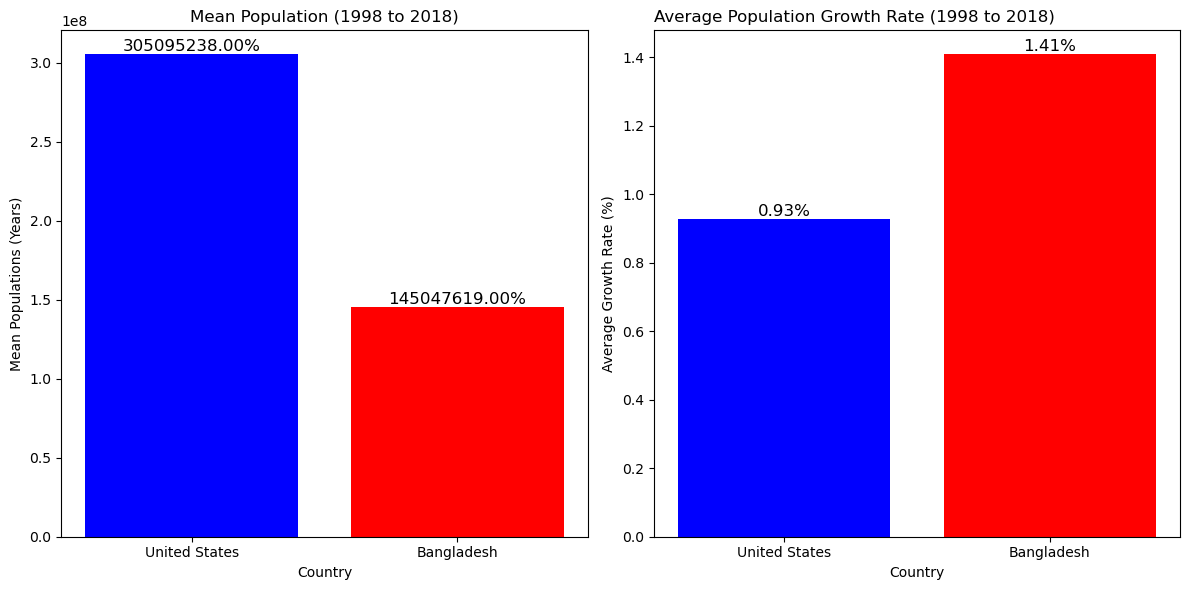

In [148]:
# population graphs
#Average Population Growth Rate (1998 to 2018) for USA and Bangladesh
#A side by side comparison

#variables
countries = ['United States', 'Bangladesh']
average_growth_rates = [avg_usa_growth_rate, avg_bang_growth_rate]
mean_pop= [int(usa_pop['Mean']), int(bang_pop['Mean'])]

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Average Growth Rate (%)
axes[1].bar(countries, average_growth_rates, color=['blue', 'red'])
axes[1].set_title('Average Population Growth Rate (1998 to 2018)', loc='left')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Average Growth Rate (%)')


# Display the values on top of the bars
for i, rate in enumerate(average_growth_rates):
    axes[1].text(i, rate, f'{rate:.2f}%', ha='center', va='bottom', fontsize=12)
    

# Plot 2: Mean population
axes[0].bar(countries, mean_pop, color=['blue', 'red'])
axes[0].set_title('Mean Population (1998 to 2018)')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Mean Populations (Years)')


for i, rate in enumerate(mean_pop):
    axes[0].text(i, rate, f'{rate:.2f}%', ha='center', va='bottom', fontsize=12)
    
    
plt.tight_layout()
plt.savefig('Population_mean_avg.png')
plt.show()


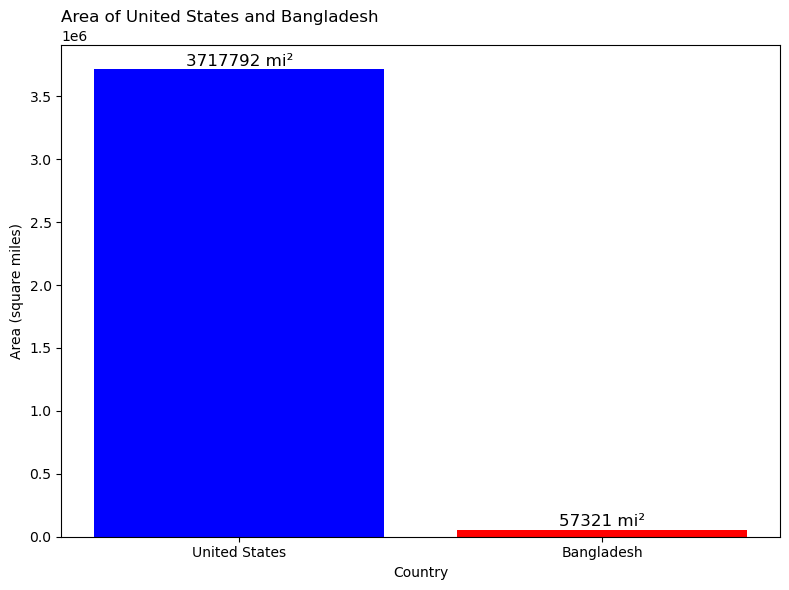

In [149]:
#variables
countries = ['United States', 'Bangladesh']
areas = [3717792, 57321] #google

plt.figure(figsize=(8, 6))
plt.bar(countries, areas, color=['blue', 'red'])
plt.title('Area of United States and Bangladesh', loc='left')
plt.xlabel('Country')
plt.ylabel('Area (square miles)')


for i, area in enumerate(areas):
    plt.text(i, area + 1000, f'{area} mi²', ha='center', va='bottom', fontsize=12)

    
plt.tight_layout()
plt.savefig('Country_area.png')
plt.show()

In [151]:
years = [str(year) for year in range(1998, 2019)]

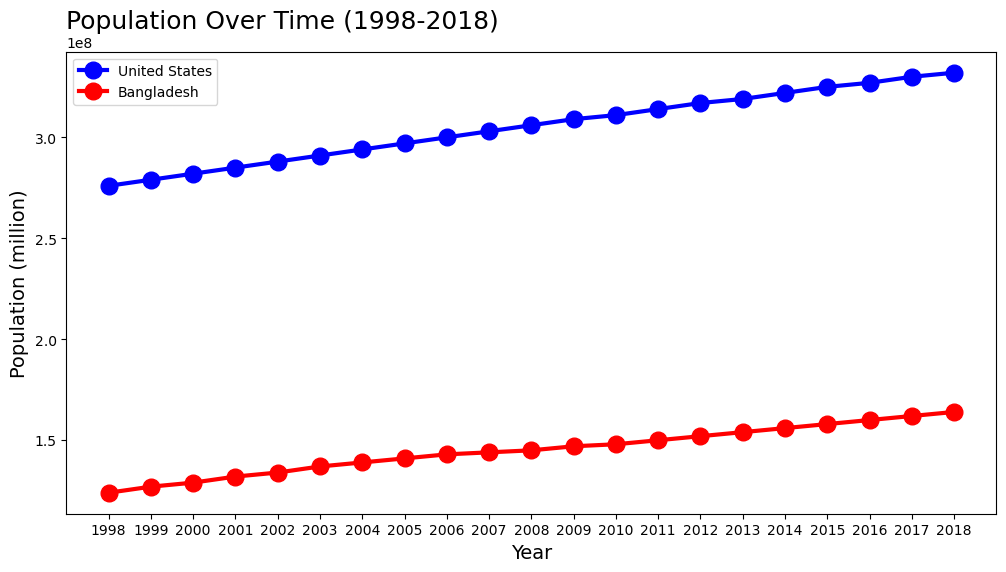

In [152]:
#Single Graph
#compare the populations in USA and Bangladesh from 2000 to 2020
plt.figure(figsize=(12, 6))
plt.plot(years, Usa_pop, label='United States', marker='o', markersize=12, color='blue', linewidth=3)
plt.plot(years, Bang_pop, label='Bangladesh', marker='o', markersize=12, color='red', linewidth=3)

#labels 
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Population (million)', fontsize = 14)
plt.title('Population Over Time (1998-2018)', loc = 'left', fontsize = 18)

plt.legend()
plt.savefig('Population Over Time (1998-2018).png')

plt.show()

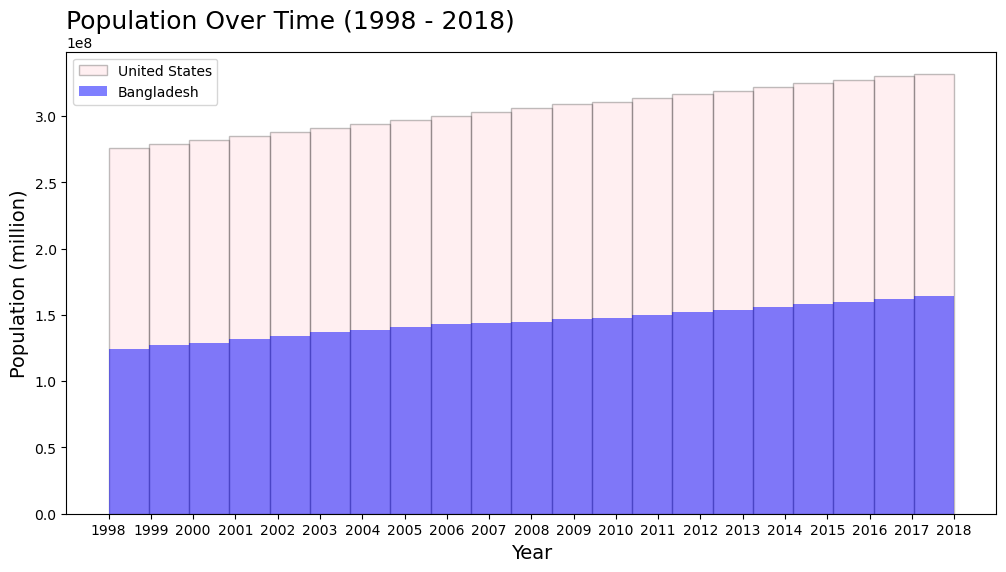

In [153]:
#Single Graph
# Plot histograms for USA and Bangladesh populations with transparency overlapp with eachother
plt.figure(figsize=(12, 6))
plt.hist(years, bins=len(years), weights=Usa_pop, alpha=1/4, label='United States', edgecolor='black', color='pink')
plt.hist(years, bins=len(years), weights=Bang_pop, alpha=1/2, label='Bangladesh', color='blue')

# Labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population (million)', fontsize=14)
plt.title('Population Over Time (1998 - 2018)', loc='left', fontsize=18)
plt.legend()
plt.savefig('Population Over Time (1998 - 2018).png')

plt.show()

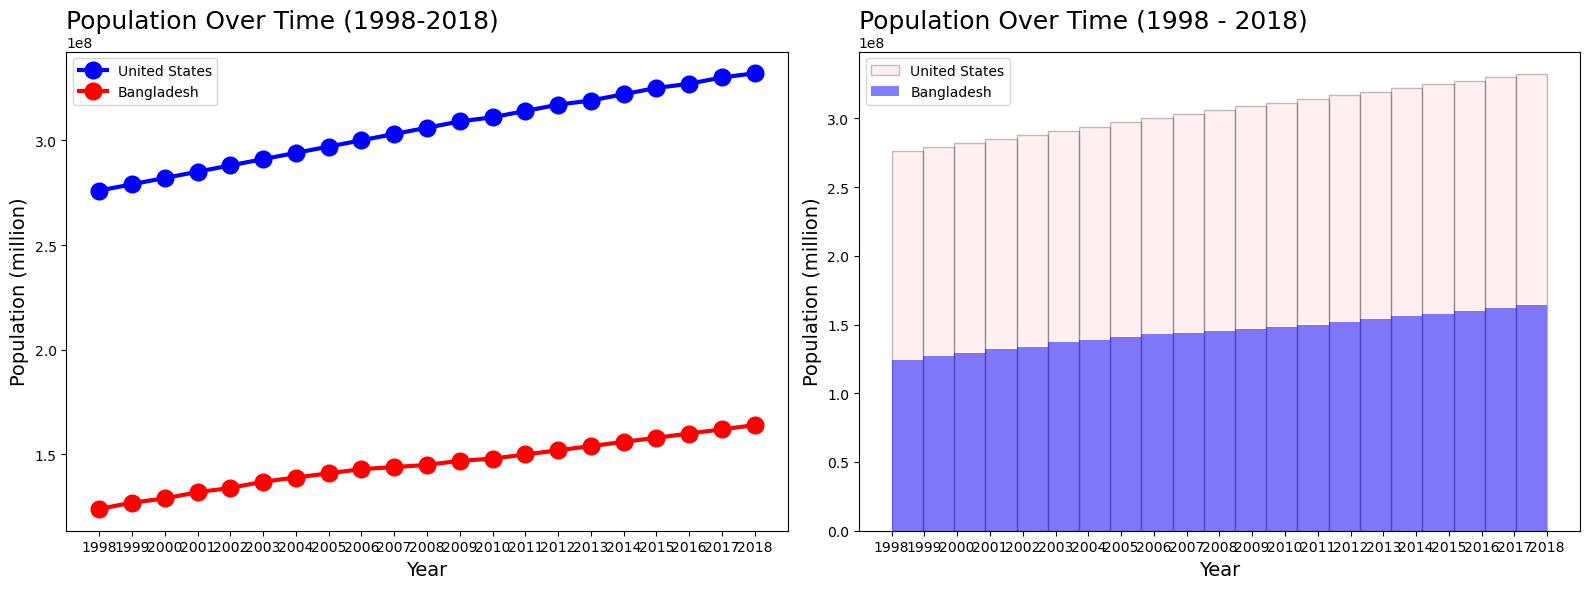

In [154]:
# Combined two plots
# Creating a subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Population Trends
axes[0].plot(years, Usa_pop, label='United States', marker='o', markersize=12, color='blue', linewidth=3)
axes[0].plot(years, Bang_pop, label='Bangladesh', marker='o', markersize=12, color='red', linewidth=3)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Population (million)', fontsize=14)
axes[0].set_title('Population Over Time (1998-2018)', loc='left', fontsize=18)
axes[0].legend()

# Plot 2: Population Histograms
axes[1].hist(years, bins=len(years), weights=Usa_pop, alpha=1/4, label='United States', edgecolor='black', color='pink')
axes[1].hist(years, bins=len(years), weights=Bang_pop, alpha=1/2, label='Bangladesh', color='blue')
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Population (million)', fontsize=14)
axes[1].set_title('Population Over Time (1998 - 2018)', loc='left', fontsize=18)
axes[1].legend()

plt.tight_layout()  # Ensure proper spacing between subplots
plt.savefig('Population_Comparison.png')
plt.show()

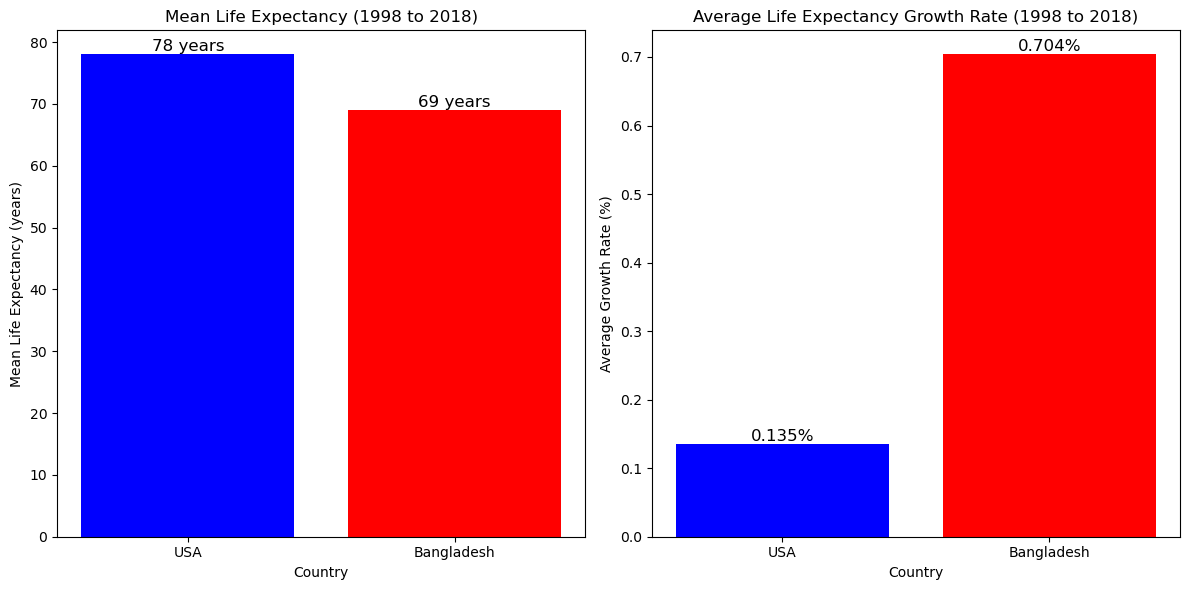

In [156]:
#Two graph side by side
average_growth_rates = [float(avg_usa_le_growth_rate), float(avg_bang_le_growth_rate)]
mean_life_expectancy = [int(usa_life_expectancy['Mean']), int(bang_life_expectancy['Mean'])]
countries = ['USA', 'Bangladesh']

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 2: Mean Life Expectancy
axes[0].bar(countries, mean_life_expectancy, color=['blue', 'red'])
axes[0].set_title('Mean Life Expectancy (1998 to 2018)')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Mean Life Expectancy (years)')

for i, mean in enumerate(mean_life_expectancy):
    axes[0].text(i, mean, f'{mean} years', ha='center', va='bottom', fontsize=12)

# Plot 1: Average Life Expectancy Growth Rate
axes[1].bar(countries, average_growth_rates, color=['blue', 'red'])
axes[1].set_title('Average Life Expectancy Growth Rate (1998 to 2018)')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Average Growth Rate (%)')

for i, rate in enumerate(average_growth_rates):
    axes[1].text(i, rate, f'{rate:.3f}%', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.savefig('LifeE_Mean_Avg.png')
plt.show()

In [ ]:
#compare the life expectency in USA and Bangladesh from 2000 to 2020
plt.figure(figsize=(12, 6))
plt.plot(years, Usa_le , label='United States', marker='o', markersize=12, color='blue', linewidth=3)
plt.plot(years, Bang_le, label='Bangladesh', marker='o', markersize=12, color='red', linewidth=3)

#labels 
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Life Expectancy', fontsize = 14)
plt.title('Life Expectancy Over Time (1998-2018)', loc = 'left', fontsize = 18)

plt.legend()
plt.savefig('Life Expectancy Over Time (1998-2018)')

plt.show()

In [ ]:
# Plot histograms for USA and Bangladesh populations with transparency overlapp with eachother
plt.figure(figsize=(12, 6))
plt.hist(years, bins=len(years), weights=usa_le, alpha=1/4, label='United States', edgecolor='black', color='pink')
plt.hist(years, bins=len(years), weights=bang_le, alpha=1/2, label='Bangladesh', color='red')

plt.xlabel('Year', fontsize=14)
plt.ylabel('Population (million)', fontsize=14)
plt.title('Life Expectancy Over Time (1998-2018)', loc='left', fontsize=18)
plt.legend()

plt.show()

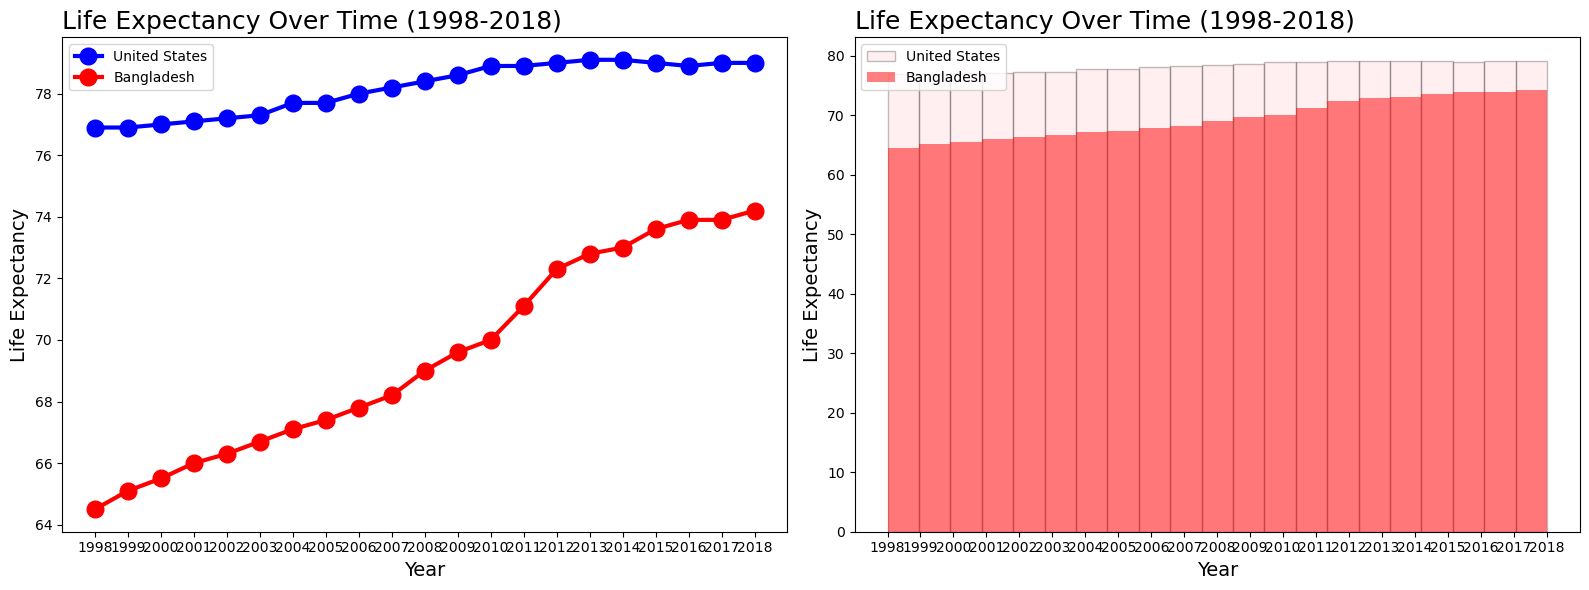

In [158]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Life Expectancy Trends
axes[0].plot(years, Usa_le, label='United States', marker='o', markersize=12, color='blue', linewidth=3)
axes[0].plot(years, Bang_le, label='Bangladesh', marker='o', markersize=12, color='red', linewidth=3)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Life Expectancy', fontsize=14)
axes[0].set_title('Life Expectancy Over Time (1998-2018)', loc='left', fontsize=18)
axes[0].legend()

# Plot 2: Life Expectancy Histograms
axes[1].hist(years, bins=len(years), weights=Usa_le, alpha=1/4, label='United States', edgecolor='black', color='pink')
axes[1].hist(years, bins=len(years), weights=Bang_le, alpha=1/2, label='Bangladesh', color='red')
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Life Expectancy', fontsize=14)
axes[1].set_title('Life Expectancy Over Time (1998-2018)', loc='left', fontsize=18)
axes[1].legend()

plt.tight_layout() 
plt.savefig('Life_Expectancy_Comparison.png')
plt.show()

In [ ]:
#compare the life expectency in USA and Bangladesh from 2000 to 2020
plt.figure(figsize=(12, 6))
plt.plot(years, Usa_le_2020 , label='United States', marker='o', markersize=12, color='blue', linewidth=3)
plt.plot(years, Bang_le_2020, label='Bangladesh', marker='o', markersize=12, color='red', linewidth=3)

#labels 
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Life Expectancy', fontsize = 14)
plt.title('Life Expectancy Over Time (2000-2020)', loc = 'left', fontsize = 18)

plt.legend()
plt.savefig('Life Expectancy Over Time (2000-2020)')

plt.show()

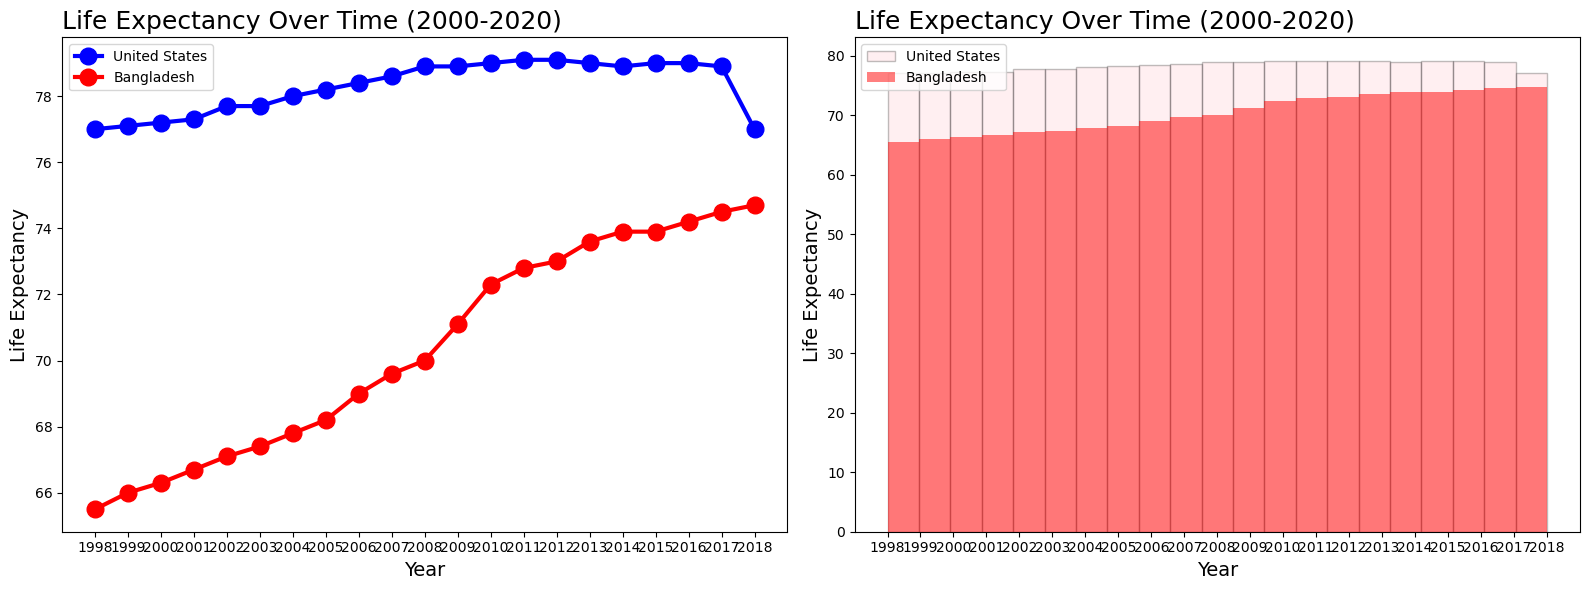

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Life Expectancy Trends
axes[0].plot(years, Usa_le_2020, label='United States', marker='o', markersize=12, color='blue', linewidth=3)
axes[0].plot(years, Bang_le_2020, label='Bangladesh', marker='o', markersize=12, color='red', linewidth=3)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('Life Expectancy', fontsize=14)
axes[0].set_title('Life Expectancy Over Time (2000-2020)', loc='left', fontsize=18)
axes[0].legend()

# Plot 2: Life Expectancy Histograms
axes[1].hist(years, bins=len(years), weights=Usa_le_2020, alpha=1/4, label='United States', edgecolor='black', color='pink')
axes[1].hist(years, bins=len(years), weights=Bang_le_2020, alpha=1/2, label='Bangladesh', color='red')
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylabel('Life Expectancy', fontsize=14)
axes[1].set_title('Life Expectancy Over Time (2000-2020)', loc='left', fontsize=18)
axes[1].legend()

plt.tight_layout() 
plt.savefig('Life_Expectancy_Comparison_2020.png')
plt.show()

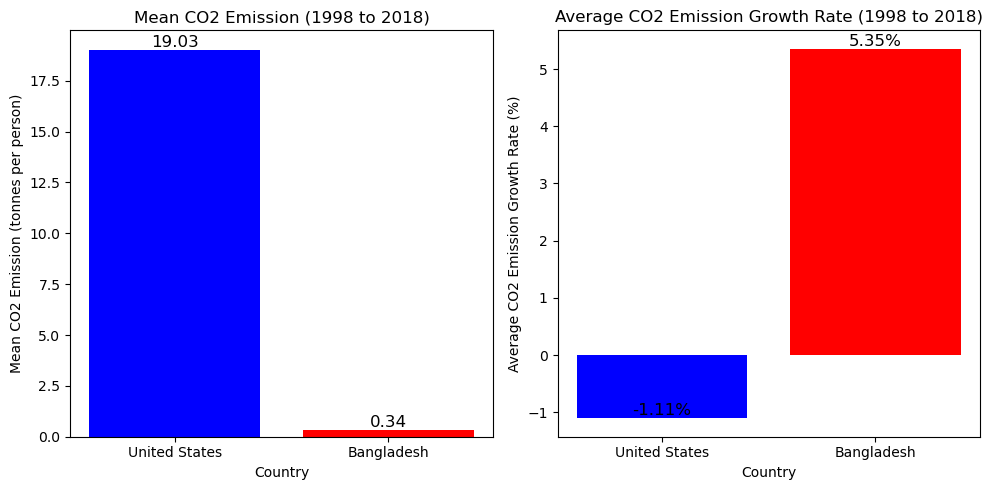

In [172]:
countries = ['United States', 'Bangladesh']
average_CO2_growth_rates = [avg_usa_CO2_growth_rates, avg_bang_CO2_growth_rates]
mean_CO2 = [float(usa_CO2_emission['Mean']), float(bang_CO2_emission['Mean'])]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot 2: Mean CO2 Emission
axes[0].bar(countries, mean_CO2, color=['blue', 'red'])
axes[0].set_title('Mean CO2 Emission (1998 to 2018)')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Mean CO2 Emission (tonnes per person)')

for i, rate in enumerate(mean_CO2):
    axes[0].text(i, rate, f'{rate:.2f}', ha='center', va='bottom', fontsize=12)


# Plot 1: Average CO2 Growth Rate (%)
axes[1].bar(countries, average_CO2_growth_rates, color=['blue', 'red'])
axes[1].set_title('Average CO2 Emission Growth Rate (1998 to 2018)')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Average CO2 Emission Growth Rate (%)')

for i, rate in enumerate(average_CO2_growth_rates):
    axes[1].text(i, rate, f'{rate:.2f}%', ha='center', va='bottom', fontsize=12)


plt.tight_layout()
plt.savefig('Mean and Avg  CO2 Emmission (1998-2018)')
plt.show()

In [ ]:
#compare the lCO2 Emmission Over Time (1998-2018) in USA and Bangladesh from 2000 to 2020
plt.figure(figsize=(12, 6))
plt.plot(years, usa_CO2, label='United States', marker='o', markersize=12, color='blue', linewidth=3)
plt.plot(years, bang_CO2, label='Bangladesh', marker='o', markersize=12, color='red', linewidth=3)

#labels 
plt.xlabel('Year', fontsize = 14)
plt.ylabel('CO2 Emmission (tonnes per person)', fontsize = 14)
plt.title('CO2 Emmission Over Time (1998-2018)', loc = 'left', fontsize = 18)

plt.legend()
plt.savefig('CO2 Emmission Over Time (1998-2018)')

plt.show()

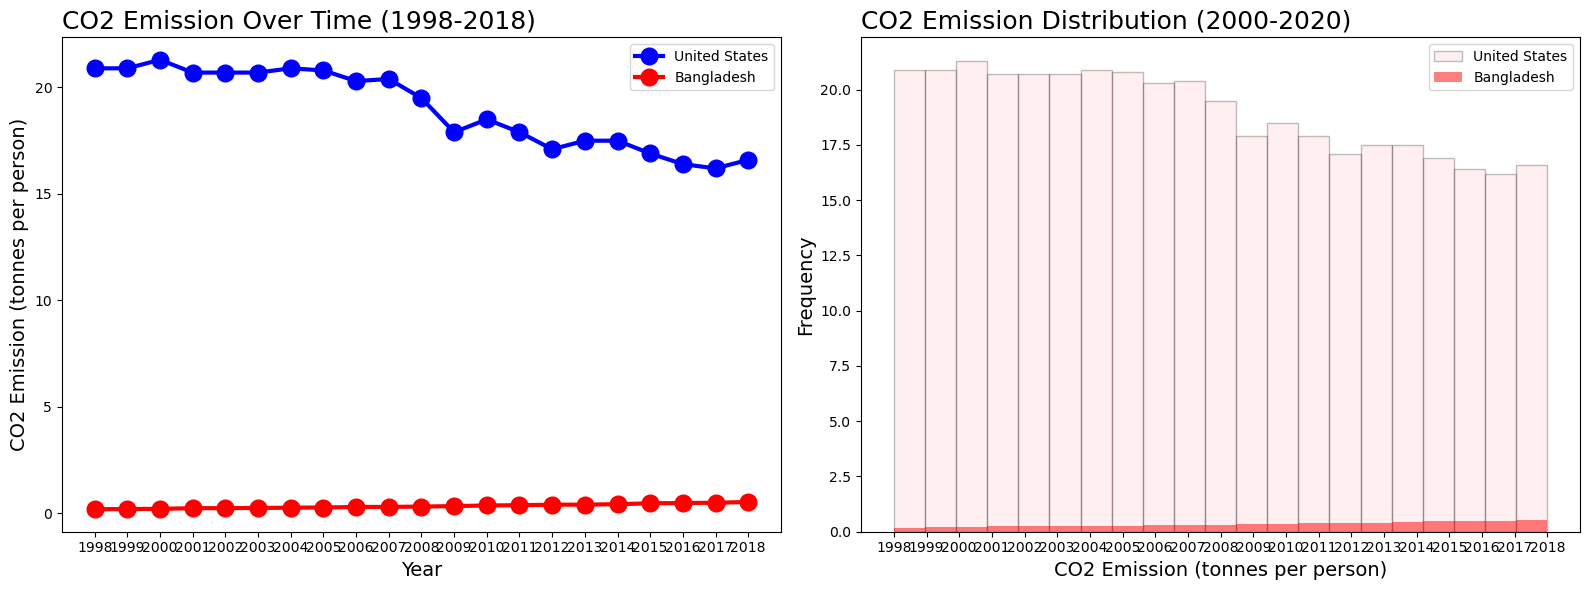

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: CO2 Emissions Trends
axes[0].plot(years, usa_CO2, label='United States', marker='o', markersize=12, color='blue', linewidth=3)
axes[0].plot(years, bang_CO2, label='Bangladesh', marker='o', markersize=12, color='red', linewidth=3)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_ylabel('CO2 Emission (tonnes per person)', fontsize=14)
axes[0].set_title('CO2 Emission Over Time (1998-2018)', loc='left', fontsize=18)
axes[0].legend()

# Plot 2: CO2 Emissions Histograms
axes[1].hist(years, bins=len(years), weights=usa_CO2, alpha=1/4, label='United States', edgecolor='black', color='pink')
axes[1].hist(years, bins=len(years), weights=bang_CO2, alpha=1/2, label='Bangladesh', color='red')
axes[1].set_xlabel('CO2 Emission (tonnes per person)', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)
axes[1].set_title('CO2 Emission Distribution (2000-2020)', loc='left', fontsize=18)
axes[1].legend()

plt.tight_layout() 
plt.savefig('CO2_Emission_Comparison.png')
plt.show()

In [ ]:
import scipy.stats as stats  # Import the stats module from SciPy

In [ ]:
#scatter plot with a correlation regression line
sns.regplot(x = Usa_le, y = usa_CO2, color='red', scatter_kws={"alpha":0.7}, line_kws={"color":"blue","alpha":0.7,"lw":2})

# To calculate the correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(Usa_le, usa_CO2)

# Set labels and title using Matplotlib functions
plt.xlabel('Life Expectancy', fontsize=14)
plt.ylabel('CO2 Emission (tonnes per person)', fontsize=14)
plt.title(f'Life Expectancy over CO2 Emission (1998-2018)\nCorrelation Coefficient: {correlation_coefficient:.4f}\nP-Value: {p_value:.4f}', fontsize=18, loc='left')

plt.savefig('Usa_Life_Expectancy_CO2_Emission_Corr.png')
plt.show()

# Print the calculated p-value
print(f'P-Value: {p_value:.4f}')
print(f'Correlation Coefficient: {correlation_coefficient:.4f}')

In [ ]:
#scatter plot with a correlation regression line
sns.regplot(x = Bang_le, y = bang_CO2, color='red', scatter_kws={"alpha":0.7}, line_kws={"color":"blue","alpha":0.7,"lw":2})

# To calculate the correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(Bang_le, bang_CO2)

# Set labels and title using Matplotlib functions
plt.xlabel('Life Expectancy', fontsize=14)
plt.ylabel('CO2 Emission (tonnes per person)', fontsize=14)
plt.title(f'Life Expectancy over CO2 Emission (1998-2018)\nCorrelation Coefficient: {correlation_coefficient:.4f}\nP-Value: {p_value:.4f}', fontsize=18, loc='left')

plt.savefig('Bang_Life_Expectancy_CO2_Emission_Corr.png')
plt.show()

# Print the calculated p-value
print(f'P-Value: {p_value:.4f}')

In [ ]:
#scatter plot with a correlation regression line
sns.regplot(x = Usa_pop, y = usa_CO2, color='red', scatter_kws={"alpha":0.7}, line_kws={"color":"blue","alpha":0.7,"lw":2})

# To calculate the correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(Usa_pop, usa_CO2)

# Set labels and title using Matplotlib functions
plt.xlabel('Population', fontsize=14)
plt.ylabel('CO2 Emission (tonnes per person)', fontsize=14)
plt.title(f'Population over CO2 Emission (1998-2018)\nCorrelation Coefficient: {correlation_coefficient:.4f}\nP-Value: {p_value:.4f}', fontsize=18, loc='left')

plt.savefig('Usa_Population_CO2_Emission_Corr.png')
plt.show()

# Print the calculated p-value
print(f'P-Value: {p_value:.4f}')

In [ ]:
#C:python-graph-gallery.com
#C:lesson dataviz

Bang_pop = pd.to_numeric(Bang_pop, errors='coerce')
bang_CO2 = pd.to_numeric(bang_CO2, errors='coerce')

# Create the scatter plot with regression line
sns.regplot(x=Bang_pop, y=bang_CO2, color='red', scatter_kws={"alpha": 0.7}, line_kws={"color": "blue", "alpha": 0.7, "lw": 2})

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(Bang_pop, bang_CO2)

# Set labels and title using Matplotlib functions
plt.xlabel('Population', fontsize=14)
plt.ylabel('CO2 Emission (tonnes per person)', fontsize=14)
plt.title(f'Population vs. CO2 Emission (1998-2018)\nCorrelation Coefficient: {correlation_coefficient:.4f}\nP-Value: {p_value:.4f}', fontsize=18, loc='left')

plt.savefig('Bang_Population_CO2_Emission_Corr.png')
plt.show()

# Print the calculated p-value
print(f'P-Value: {p_value:.4f}')

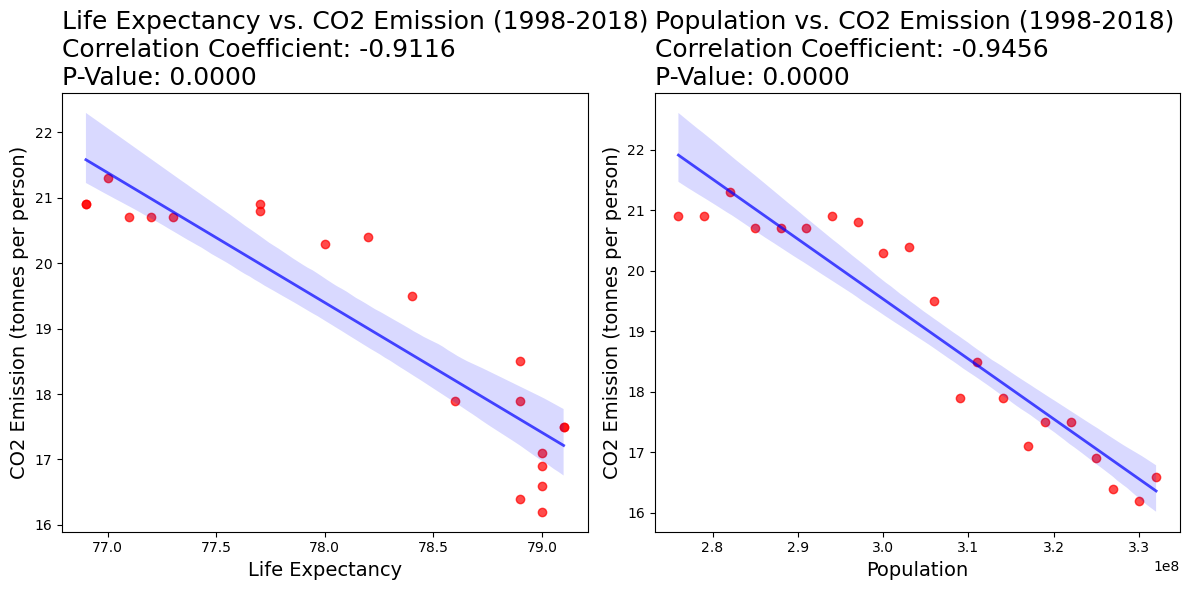

P-Value for Plot 1: 0.0000
P-Value for Plot 2: 0.0000
Correlation Coefficient for Plot 1: -0.9116
Correlation Coefficient for Plot 2: -0.9456


In [174]:
#C:python-graph-gallery.com
#C:lesson dataviz

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot 1: Life Expectancy vs. CO2 Emission
sns.regplot(x=Usa_le, y=usa_CO2, color='red', scatter_kws={"alpha": 0.7}, line_kws={"color": "blue", "alpha": 0.7, "lw": 2}, ax=axes[0])

# Calculate the correlation coefficient and p-value for plot 1
correlation_coefficient_1, p_value_1 = stats.pearsonr(Usa_le, usa_CO2)

# Set labels and title for plot 1
axes[0].set_xlabel('Life Expectancy', fontsize=14)
axes[0].set_ylabel('CO2 Emission (tonnes per person)', fontsize=14)
axes[0].set_title(f'Life Expectancy vs. CO2 Emission (1998-2018)\nCorrelation Coefficient: {correlation_coefficient_1:.4f}\nP-Value: {p_value_1:.4f}', fontsize=18, loc='left')

# Scatter plot 2: Population vs. CO2 Emission
sns.regplot(x=Usa_pop, y=usa_CO2, color='red', scatter_kws={"alpha": 0.7}, line_kws={"color": "blue", "alpha": 0.7, "lw": 2}, ax=axes[1])

#correlation coefficient and p-value for plot 2
correlation_coefficient_2, p_value_2 = stats.pearsonr(Usa_pop, usa_CO2)

# Set labels and title for plot 2
axes[1].set_xlabel('Population', fontsize=14)
axes[1].set_ylabel('CO2 Emission (tonnes per person)', fontsize=14)
axes[1].set_title(f'Population vs. CO2 Emission (1998-2018)\nCorrelation Coefficient: {correlation_coefficient_2:.4f}\nP-Value: {p_value_2:.4f}', fontsize=18, loc='left')


plt.tight_layout()
plt.savefig('Usa_LE_CO2_Combined.png')
plt.show()

# Print the p-values
print(f'P-Value for Plot 1: {p_value_1:.4f}')
print(f'P-Value for Plot 2: {p_value_2:.4f}')

print(f'Correlation Coefficient for Plot 1: {correlation_coefficient_1:.4f}')
print(f'Correlation Coefficient for Plot 2: {correlation_coefficient_2:.4f}')


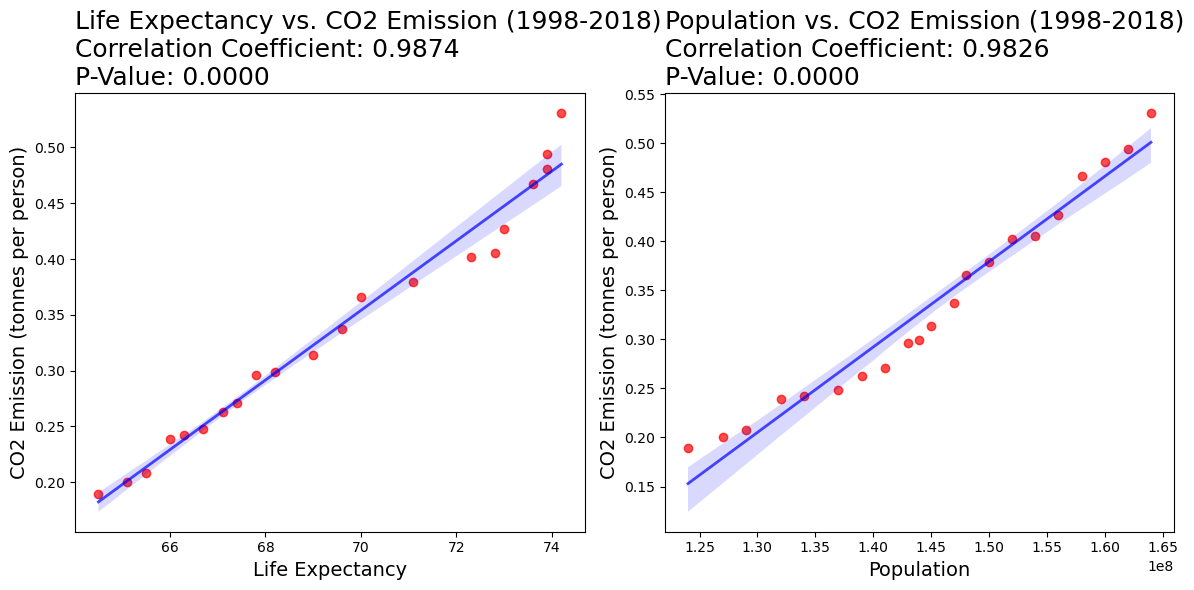

P-Value for Plot 1: 0.0000
P-Value for Plot 2: 0.0000
Correlation Coefficient for Plot 1: 0.9874
Correlation Coefficient for Plot 2: 0.9826


In [176]:
#C:python-graph-gallery.com
#C:lesson dataviz

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot 1: Life Expectancy vs. CO2 Emission
sns.regplot(x=Bang_le, y=bang_CO2, color='red', scatter_kws={"alpha": 0.7}, line_kws={"color": "blue", "alpha": 0.7, "lw": 2}, ax=axes[0])

# Calculate the correlation coefficient and p-value for plot 1
correlation_coefficient_1, p_value_1 = stats.pearsonr(Bang_le, bang_CO2)

# Set labels and title for plot 1
axes[0].set_xlabel('Life Expectancy', fontsize=14)
axes[0].set_ylabel('CO2 Emission (tonnes per person)', fontsize=14)
axes[0].set_title(f'Life Expectancy vs. CO2 Emission (1998-2018)\nCorrelation Coefficient: {correlation_coefficient_1:.4f}\nP-Value: {p_value_1:.4f}', fontsize=18, loc='left')

# Scatter plot 2: Population vs. CO2 Emission
sns.regplot(x=Bang_pop, y=bang_CO2, color='red', scatter_kws={"alpha": 0.7}, line_kws={"color": "blue", "alpha": 0.7, "lw": 2}, ax=axes[1])

# Calculate the correlation coefficient and p-value for plot 2
correlation_coefficient_2, p_value_2 = stats.pearsonr(Bang_pop, bang_CO2)

# Set labels and title for plot 2
axes[1].set_xlabel('Population', fontsize=14)
axes[1].set_ylabel('CO2 Emission (tonnes per person)', fontsize=14)
axes[1].set_title(f'Population vs. CO2 Emission (1998-2018)\nCorrelation Coefficient: {correlation_coefficient_2:.4f}\nP-Value: {p_value_2:.4f}', fontsize=18, loc='left')

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure
plt.savefig('Bangladesh_Scatter_Plots.png')

# Show the plots
plt.show()

# Print the calculated p-values
print(f'P-Value for Plot 1: {p_value_1:.4f}')
print(f'P-Value for Plot 2: {p_value_2:.4f}')
print(f'Correlation Coefficient for Plot 1: {correlation_coefficient_1:.4f}')
print(f'Correlation Coefficient for Plot 2: {correlation_coefficient_2:.4f}')


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

### Problem Statement: How does CO2 emission correlates with life expectancy or Population in United States and Bangladesh from 1998 to 2018?

#### United States

**Life Expectancy vs. CO2 Emission (1998-2018)**
- The first scatter plot shows a negative correlation between life expectancy and CO2 emissions in the United States from 1998 to 2018.
- The correlation coefficient for this relationship is approximately -0.9116, which is a strong negative correlation.
- The p-value for this correlation is close to 0 (P-Value for Plot 1: 0.0000), indicating that the correlation is statistically significant.
- Therefore, as life expectancy increases, CO2 emissions tend to decrease in the United States during the specified period.

**Population vs. CO2 Emission (1998-2018)**
- The second scatter plot shows a negative correlation between population and CO2 emissions in the United States from 1998 to 2018.
- The correlation coefficient for this relationship is approximately -0.9456, which is a very strong negative correlation.
- The p-value for this correlation is also close to 0 (P-Value for Plot 2: 0.0000), indicating that the correlation is statistically significant.
- Therefore, as the population increases, CO2 emissions tend to decrease in the United States during the specified period.

**Both plots reveal strong negative correlations between the variables being examined.** 


#### Bangladesh 

**Life Expectancy vs. CO2 Emission**
- The scatter plot reveals a strong positive linear relationship between Life Expectancy and CO2 Emission.
- The correlation coefficient for this relationship is 0.9874, indicating a very high positive correlation.
- The p-value is extremely close to zero (0.0000), suggesting that the correlation observed is statistically significant.
- There is a strong positive correlation between Life Expectancy and CO2 Emission in Bangladesh between 1998 and 2018. As Life Expectancy increases, CO2 Emission also tends to increase significantly.

**Population vs. CO2 Emission**
- The scatter plot also shows a strong positive linear relationship between Population and CO2 Emission.
- The correlation coefficient for this relationship is 0.9826, indicating a very high positive correlation, similar to the first plot.
- Like the first plot, the p-value is very close to zero (0.0000), indicating that this correlation is statistically significant as well.
- There is a strong positive correlation between Population and CO2 Emission in Bangladesh between 1998 and 2018. As the population increases, CO2 Emission also tends to increase significantly.


Overall, this analysis suggests that as either life expectancy or population increases in the United States, CO2 emissions per person tend to decrease. On the other hand, in Bangladesh, as Life Expectancy or Population increases, CO2 Emission tends to increase significantly.The extremely low p-values in both cases indicate that these correlations are not due to random chance but are likely meaningful.

These findings are important for understanding the potential relationships between environmental sustainability (measured by CO2 emissions) and demographic factors (life expectancy and population) over the specified time period. However, it's essential to keep in mind that correlation does not imply causation, and further research and analysis would be needed to determine the underlying causes of these observed correlations.


